In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [78]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, theta):
    """Predict probabilities for logistic regression."""
    return sigmoid(np.dot(X, theta))

def predict_class(X, theta, threshold=0.5):
    """Predict binary classes given a threshold."""
    return (predict_proba(X, theta) >= threshold).astype(int)

In [79]:

def confusion_matrix(y_true, y_pred):
    """Compute confusion matrix as (TP, FP, FN, TN)."""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, fp, fn, tn

def accuracy(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_true, y_pred)
    return (tp + tn) / (tp + tn + fp + fn)

def precision(y_true, y_pred):
    tp, fp, _, _ = confusion_matrix(y_true, y_pred)
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp, _, fn, _ = confusion_matrix(y_true, y_pred)
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-8)

In [80]:
def roc_curve(y_true, y_scores, thresholds=np.linspace(0,1,100)):
    tpr_list = []
    fpr_list = []
    for t in thresholds:
        y_pred = (y_scores >= t).astype(int)
        tp, fp, fn, tn = confusion_matrix(y_true, y_pred)
        tpr = tp / (tp + fn + 1e-8)   # Sensitivity
        fpr = fp / (fp + tn + 1e-8)   # 1 - Specificity
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return np.array(fpr_list), np.array(tpr_list)

def auc(fpr, tpr):
    """Compute AUC using trapezoidal rule."""
    return np.trapz(tpr, fpr)

In [81]:
def precision_recall_curve(y_true, y_scores, thresholds=np.linspace(0,1,100)):
    precisions = []
    recalls = []
    for t in thresholds:
        y_pred = (y_scores >= t).astype(int)
        precisions.append(precision(y_true, y_pred))
        recalls.append(recall(y_true, y_pred))
    return np.array(recalls), np.array(precisions)

In [82]:
df = pd.read_csv('C:/Users/dilshan/Documents/AI_ML_Course(zuu)/week03/zuu_crew_scores.csv')

# Convert to binary classification: Pass (1) if score >= 50, else Fail (0)
df["label"] = (df["CapstoneScore"] >= 50).astype(int)

# Feature matrix & target
X = df[['EducationLevel', 'Attendance', 'TotalHours', 'AssignmentsCompleted',
        'HackathonParticipation', 'GitHubScore', 'PeerReviewScore']].values

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

y = df["label"].values

# Load trained logistic regression weights (replace with your theta from Part 6)
theta = np.random.randn(X.shape[1])  # placeholder, use trained values

# Predictions
y_scores = predict_proba(X, theta)
y_pred = predict_class(X, theta, threshold=0.5)

Confusion Matrix (TP, FP, FN, TN): (np.int64(55), np.int64(22), np.int64(33), np.int64(40))
Accuracy: 0.6333333333333333
Precision: 0.71428571419295
Recall: 0.6249999999289774
F1-Score: 0.666666661608081


C:\Users\dilshan\AppData\Local\Temp\ipykernel_7652\1669479862.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


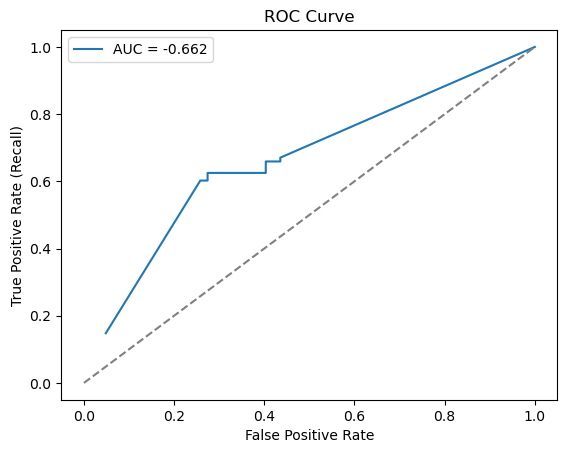

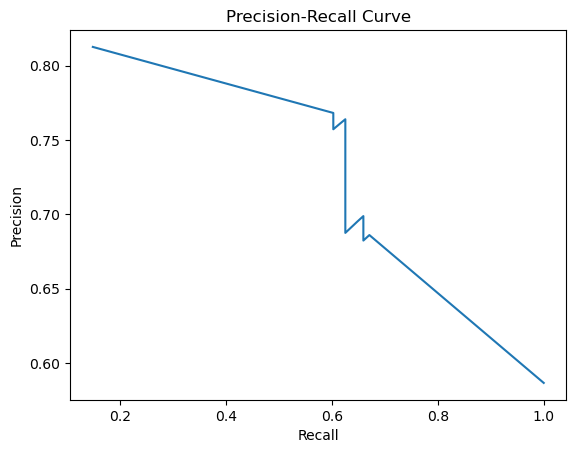


Threshold = 0.3
Accuracy: 0.6266666666666667
Precision: 0.7051282050378042
Recall: 0.6249999999289774
F1-Score: 0.6626505973479462

Threshold = 0.5
Accuracy: 0.6333333333333333
Precision: 0.71428571419295
Recall: 0.6249999999289774
F1-Score: 0.666666661608081

Threshold = 0.7
Accuracy: 0.64
Precision: 0.7236842104310942
Recall: 0.6249999999289774
F1-Score: 0.6707317022620465


In [83]:
print("Confusion Matrix (TP, FP, FN, TN):", confusion_matrix(y, y_pred))
print("Accuracy:", accuracy(y, y_pred))
print("Precision:", precision(y, y_pred))
print("Recall:", recall(y, y_pred))
print("F1-Score:", f1_score(y, y_pred))

# ROC Curve
fpr, tpr = roc_curve(y, y_scores)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
recalls, precisions = precision_recall_curve(y, y_scores)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# --------------------------------------------------------
# Threshold Tuning Analysis
# --------------------------------------------------------

for t in [0.3, 0.5, 0.7]:
    y_pred_t = predict_class(X, theta, threshold=t)
    print(f"\nThreshold = {t}")
    print("Accuracy:", accuracy(y, y_pred_t))
    print("Precision:", precision(y, y_pred_t))
    print("Recall:", recall(y, y_pred_t))
    print("F1-Score:", f1_score(y, y_pred_t))